In [129]:
!pip install --user mysql-client

In [130]:
!pip3 install --user mysqlclient

In [131]:
!pip install mysql-connector-python-rf

Defaulting to user installation because normal site-packages is not writeable


In [170]:
!Pip install sklearn

/bin/bash: Pip: command not found


In [171]:
myvars = {}
with open("myamsani-mysql-password") as myfile:
     for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

In [172]:
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Sp21grp9_db')
cursor = conn.cursor()

In [173]:
cursor.execute('select * from Pulsesurvey')
rows = cursor.fetchall() 
columns = cursor.description
print(len(rows))
print(type(rows))
data = list(rows)

127261
<class 'tuple'>


In [174]:
cursor.execute('select * from Pulsesurvey')

127261

In [175]:
import pandas as pd
import scipy.stats
import numpy as np

data_df = pd.DataFrame(data)
print(data_df)

          0  1  2  3  4  5  6  7  8  9   ...   29   30   31   32   33   34  \
0       1962  2  1  4  4  2  0  2  3  2  ...    1  -88  -88  -88  -88  -88   
1       1941  1  1  1  5  1  0  2  1  2  ...    2  -88  -88  -88  -88  -88   
2       1951  2  1  1  4  3  0  2  3  2  ...    1  -88  -88  -88  -88  -88   
3       1978  1  1  2  3  1  4  2  2  1  ...    3    1  -99  -99    1  -99   
4       1985  2  1  1  6  1  3  2  1  2  ...  -88  -88  -88  -88  -88  -88   
...      ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...   
127256  1962  1  1  1  7  1  0  2  1  1  ...    2  -88  -88  -88  -88  -88   
127257  1969  1  1  1  4  5  0  2  1  2  ...    1  -88  -88  -88  -88  -88   
127258  1950  1  1  1  4  3  0  2  1  1  ...    1  -88  -88  -88  -88  -88   
127259  1982  1  1  1  4  1  3  2  2  2  ...    2    1  -99  -99  -99  -99   
127260  1959  2  1  1  5  3  0  2  2  2  ...    1  -88  -88  -88  -88  -88   

         35   36   37   38  
0       -88  -88  -88  -88  
1    

In [176]:
cols=[]
for col in columns:
    cols.append(col[0])

In [177]:
import pandas as pd
import scipy.stats
import numpy as np

data_df = pd.DataFrame(data)
data_df.columns = cols
data_df.head()

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Recvacc,Getvacc,Workloss,...,Tenure,Enroll1,Enroll2,Enroll3,Teach1,Teach2,Teach3,Teach4,Teach5,Income
0,1962,2,1,4,4,2,0,2,3,2,...,1,-88,-88,-88,-88,-88,-88,-88,-88,-88
1,1941,1,1,1,5,1,0,2,1,2,...,2,-88,-88,-88,-88,-88,-88,-88,-88,4
2,1951,2,1,1,4,3,0,2,3,2,...,1,-88,-88,-88,-88,-88,-88,-88,-88,-99
3,1978,1,1,2,3,1,4,2,2,1,...,3,1,-99,-99,1,-99,-99,-99,-99,3
4,1985,2,1,1,6,1,3,2,1,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88


In [178]:
data_df.columns

Index(['Birthyear', 'Gender', 'Hispanic', 'Race', 'Education', 'Maritalstatus',
       'Numkid', 'Recvacc', 'Getvacc', 'Workloss', 'Expectloss', 'Anywork',
       'Kindwork', 'Expensdiff', 'Anxious', 'Worry', 'Interest', 'Down',
       'Hlthins1', 'Hlthins2', 'Hlthins3', 'Hlthins4', 'Hlthins5', 'Hlthins6',
       'Hlthins7', 'Hlthins8', 'Prescript', 'Mh_svcs', 'Mh_notget', 'Tenure',
       'Enroll1', 'Enroll2', 'Enroll3', 'Teach1', 'Teach2', 'Teach3', 'Teach4',
       'Teach5', 'Income'],
      dtype='object')

In [179]:
import pandas as pd
import scipy.stats
import numpy as np

df = pd.read_csv('Pulsesurvey_New (1).csv')
df.head()

,Birthyear,Race,Education,Numkid,Getvacc,Expectloss,Anywork,Kindwork,Expensdiff,Anxious,Worry,Interest,Down,Mh_svcs,Enroll2,Teach4,Income
0,1962,4,4,0,3,2,2,-88,3,1,1,1,1,2,-88,-88,-88
1,1941,1,5,0,1,2,2,-88,3,4,4,3,3,2,-88,-88,4
2,1951,1,4,0,3,2,2,-88,2,4,4,3,2,2,-88,-88,-99
3,1978,2,3,4,2,2,1,2,4,3,3,1,2,2,-99,-99,3
4,1985,1,6,3,1,2,1,2,2,-88,-88,-88,-88,-88,-88,-88,-88


In [270]:
data=pd.read_csv('Pulsesurvey_New (1).csv')
df = pd.DataFrame(data, columns = ['Birthyear','Race','Education','Numkid', 'Getvacc',])
df

,Birthyear,Race,Education,Numkid,Getvacc
0,1962,4,4,0,3
1,1941,1,5,0,1
2,1951,1,4,0,3
3,1978,2,3,4,2
4,1985,1,6,3,1
...,...,...,...,...,...
127256,1962,1,7,0,1
127257,1969,1,4,0,1
127258,1950,1,4,0,1
127259,1982,1,4,3,2


<AxesSubplot:>

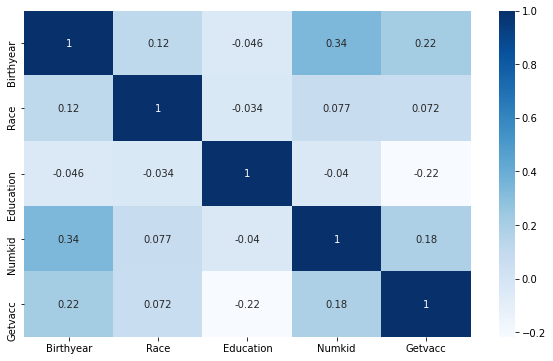

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True,cmap='Blues')

In [180]:
indexNames = df[df['Getvacc'] == 3].index
indexNames2 = df[df['Getvacc'] == 2].index

df.drop(indexNames , inplace=True)
df.drop(indexNames2 , inplace=True)

df['binary']=df['Getvacc'].apply(lambda x: 0 if(x==4) else(1))
df['Birthyear_bins'] = pd.cut(x=df['Birthyear'], bins=[1931, 1951, 1961, 1971, 1981, 1991, 2011])
df['Birthyear_codes'] = pd.cut(x=df['Birthyear'], bins=[1931, 1951, 1961, 1971, 1981, 1991, 2011], labels=[1,2,3,4,5,6])
df

,Birthyear,Race,Education,Numkid,Getvacc,Expectloss,Anywork,Kindwork,Expensdiff,Anxious,Worry,Interest,Down,Mh_svcs,Enroll2,Teach4,Income,binary,Birthyear_bins,Birthyear_codes
1,1941,1,5,0,1,2,2,-88,3,4,4,3,3,2,-88,-88,4,1,"(1931, 1951]",1
4,1985,1,6,3,1,2,1,2,2,-88,-88,-88,-88,-88,-88,-88,-88,1,"(1981, 1991]",5
6,1956,1,7,0,1,2,2,-88,1,1,1,1,1,2,-88,-88,4,1,"(1951, 1961]",2
7,1979,1,7,3,1,2,1,4,3,4,4,4,4,2,-99,1,8,1,"(1971, 1981]",4
10,1969,1,6,1,1,2,1,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,"(1961, 1971]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127253,1983,1,4,3,4,1,-99,-88,-99,-88,-88,-88,-88,-88,-88,-88,-88,0,"(1981, 1991]",5
127254,1973,1,6,0,1,2,1,1,1,1,1,1,1,2,-88,-88,8,1,"(1971, 1981]",4
127256,1962,1,7,0,1,2,1,2,1,1,1,1,1,1,-88,-88,7,1,"(1961, 1971]",3
127257,1969,1,4,0,1,2,1,2,1,2,2,2,2,2,-88,-88,4,1,"(1961, 1971]",3


In [181]:
df_new = df[(df['Education']>0) & (df['Expensdiff']>0) & (df['Income']>0) & (df['Kindwork']>0) & (df['Numkid']>0)]
df_new

,Birthyear,Race,Education,Numkid,Getvacc,Expectloss,Anywork,Kindwork,Expensdiff,Anxious,Worry,Interest,Down,Mh_svcs,Enroll2,Teach4,Income,binary,Birthyear_bins,Birthyear_codes
7,1979,1,7,3,1,2,1,4,3,4,4,4,4,2,-99,1,8,1,"(1971, 1981]",4
13,1982,4,3,5,4,2,1,2,2,1,1,1,1,2,-99,-99,6,0,"(1981, 1991]",5
25,1981,1,4,2,1,2,1,2,2,2,2,2,1,2,-99,-99,5,1,"(1971, 1981]",4
37,1973,1,4,1,1,2,1,2,1,4,2,2,1,1,1,-88,8,1,"(1971, 1981]",4
50,1979,2,6,1,1,2,1,2,3,3,3,3,1,2,-99,-99,4,1,"(1971, 1981]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127188,1961,2,7,1,1,2,1,2,1,2,2,1,1,2,-99,-99,8,1,"(1951, 1961]",2
127192,1962,2,7,2,1,2,1,3,3,2,1,1,1,2,-99,-99,8,1,"(1961, 1971]",3
127193,1965,2,6,1,1,2,1,2,3,1,1,1,3,1,-99,-88,5,1,"(1961, 1971]",3
127222,1988,1,6,1,1,1,1,1,3,4,3,1,2,1,-99,1,4,1,"(1981, 1991]",5


In [188]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import plot_roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn import preprocessing

In [195]:
X = df_new[['Birthyear_codes', 'Income', 'Education']]
y = df_new["binary"]

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [196]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train_enc, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.012501
Feature 1: 0.040377
Feature 2: 0.041837


In [197]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

y_pred = dt_clf.predict(X_test)
dt_clf.score(X_test,y_test)

0.8668316831683168

In [198]:
y_pred =dt_clf .predict(X_test_fs)

print(accuracy_score(y_test_enc,y_pred))
print("\n")
print(confusion_matrix(y_test_enc, y_pred))
print("\n")
print(classification_report(y_test_enc, y_pred))

0.8668316831683168


[[  29  516]
 [  22 3473]]


              precision    recall  f1-score   support

           0       0.57      0.05      0.10       545
           1       0.87      0.99      0.93      3495

    accuracy                           0.87      4040
   macro avg       0.72      0.52      0.51      4040
weighted avg       0.83      0.87      0.82      4040



In [167]:
from xgboost import plot_tree

In [147]:
!pip install graphviz
!apt-get install graphviz

Defaulting to user installation because normal site-packages is not writeable
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [160]:
from sklearn.metrics import plot_roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn import preprocessing

# DECISION TREE CLASSIFIER

In [200]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)
model.score(X_test,y_test)

y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.8668316831683168

In [201]:
y_pred = model.predict(X_test_fs)

print(accuracy_score(y_test_enc,y_pred))
print("\n")
print(confusion_matrix(y_test_enc, y_pred))
print("\n")
print(classification_report(y_test_enc, y_pred))

0.8668316831683168


[[  29  516]
 [  22 3473]]


              precision    recall  f1-score   support

           0       0.57      0.05      0.10       545
           1       0.87      0.99      0.93      3495

    accuracy                           0.87      4040
   macro avg       0.72      0.52      0.51      4040
weighted avg       0.83      0.87      0.82      4040



/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:29:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=12
[07:29:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:29:02] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 164 extra nodes, 0 pruned nodes, max_depth=12
[07:29:03] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=13
[07:29:03] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=13
[07:29:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=14
[07:29:06] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 240 extra nodes, 0 pruned nodes, max_depth=13
[07:29:07] INFO: ../src/tree/updater_prune.cc:101: tree pr

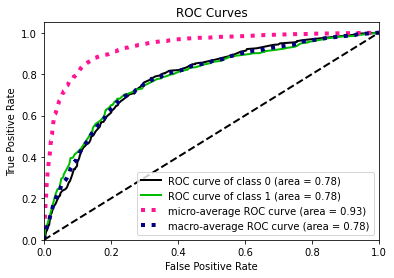

In [261]:
model.fit(X_train, y_train)
predicted_probas = model.predict_proba(X_test)

import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

# RANDOM FOREST

In [203]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)
rf_clf.score(X_train,y_train)

0.8653438030560272

In [234]:
y_pred = rf_clf.predict(X_test_fs)

print(accuracy_score(y_test_enc,y_pred))
print("\n")
print(confusion_matrix(y_test_enc, y_pred))
print("\n")
print(classification_report(y_test_enc, y_pred))

0.8599009900990099


[[  48  497]
 [  69 3426]]


              precision    recall  f1-score   support

           0       0.41      0.09      0.15       545
           1       0.87      0.98      0.92      3495

    accuracy                           0.86      4040
   macro avg       0.64      0.53      0.53      4040
weighted avg       0.81      0.86      0.82      4040



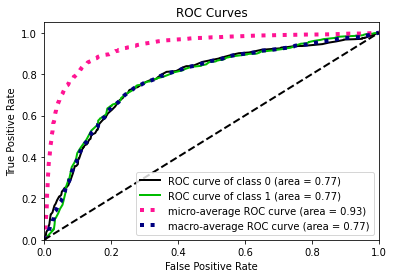

In [260]:
rf_clf.fit(X_train, y_train)
predicted_probas = rf_clf.predict_proba(X_test)

import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

# GRADIENT BOOST

In [204]:
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=40)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_train,y_train)

0.860144312393888

In [235]:
y_pred = gb_clf.predict(X_test_fs)

print(accuracy_score(y_test_enc,y_pred))
print("\n")
print(confusion_matrix(y_test_enc, y_pred))
print("\n")
print(classification_report(y_test_enc, y_pred))

0.8665841584158416


[[  14  531]
 [   8 3487]]


              precision    recall  f1-score   support

           0       0.64      0.03      0.05       545
           1       0.87      1.00      0.93      3495

    accuracy                           0.87      4040
   macro avg       0.75      0.51      0.49      4040
weighted avg       0.84      0.87      0.81      4040



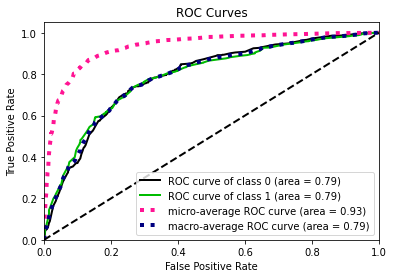

In [258]:
gb_clf.fit(X_train, y_train)
predicted_probas = gb_clf.predict_proba(X_test)

import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

# NAIVE BAYES CLASSIFIER

In [207]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_train,y_train)

0.8395585738539898

In [236]:
y_pred = nb_clf.predict(X_test_fs)

print(accuracy_score(y_test_enc,y_pred))
print("\n")
print(confusion_matrix(y_test_enc, y_pred))
print("\n")
print(classification_report(y_test_enc, y_pred))

0.8475247524752475


[[ 164  381]
 [ 235 3260]]


              precision    recall  f1-score   support

           0       0.41      0.30      0.35       545
           1       0.90      0.93      0.91      3495

    accuracy                           0.85      4040
   macro avg       0.65      0.62      0.63      4040
weighted avg       0.83      0.85      0.84      4040



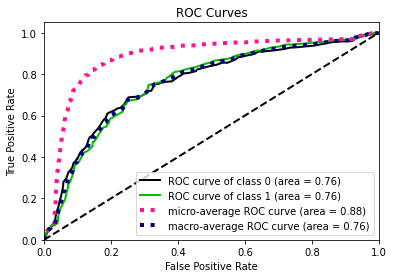

In [259]:
nb_clf.fit(X_train, y_train)
predicted_probas = nb_clf.predict_proba(X_test)

import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

# logistic regression

In [210]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_train,y_train)



0.858446519524618

In [237]:
y_pred = lr_clf.predict(X_test_fs)

print(accuracy_score(y_test_enc,y_pred))
print("\n")
print(confusion_matrix(y_test_enc, y_pred))
print("\n")
print(classification_report(y_test_enc, y_pred))

0.8633663366336634


[[  41  504]
 [  48 3447]]


              precision    recall  f1-score   support

           0       0.46      0.08      0.13       545
           1       0.87      0.99      0.93      3495

    accuracy                           0.86      4040
   macro avg       0.67      0.53      0.53      4040
weighted avg       0.82      0.86      0.82      4040



In [251]:
!pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


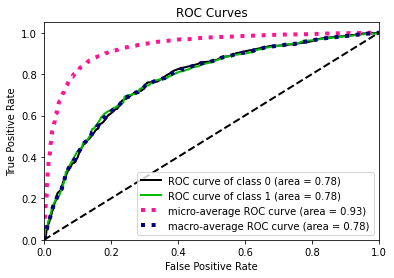

In [253]:
lr_clf.fit(X_train, y_train)
predicted_probas = lr_clf.predict_proba(X_test)

import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

# SUPPORT VECTOR MACHINE

In [232]:
from sklearn.svm import SVC
sv_clf = SVC(probability=True, kernel='linear')
fit=sv_clf.fit(X_train,y_train)
score=sv_clf.score(X_train,y_train)
prediction=sv_clf.predict(X_test)
print(fit,score,prediction)

SVC(kernel='linear', probability=True) 0.8597198641765704 [1 1 1 ... 1 1 1]


In [245]:
y_pred = sv_clf.predict(X_test)

print(accuracy_score(y_test_enc,y_pred))
print("\n")
print(confusion_matrix(y_test_enc, y_pred))
print("\n")
print(classification_report(y_test_enc, y_pred))

0.8650990099009901


[[   0  545]
 [   0 3495]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       545
           1       0.87      1.00      0.93      3495

    accuracy                           0.87      4040
   macro avg       0.43      0.50      0.46      4040
weighted avg       0.75      0.87      0.80      4040



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


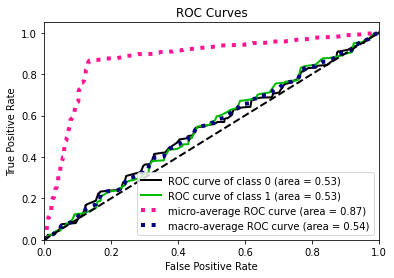

In [255]:
sv_clf.fit(X_train, y_train)
predicted_probas = sv_clf.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

# XG BOOST


In [214]:
X = df_new[['Birthyear_codes', 'Income', 'Education']]
y = df_new["binary"]

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [215]:
# one-hot encode the categorical features
cat_attribs = ['Birthyear_codes']
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)], remainder='passthrough')

encoder = full_pipeline.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)


In [239]:
xg_clf = XGBClassifier(n_estimators=10, max_depth=20, verbosity=2)
xg_clf.fit(X_train, y_train)

# extract the training set predictions
xg_clf.predict(X_train)


# extract the test set predictions
xg_clf.predict(X_test)


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:28] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=12
[20:15:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:29] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 164 extra nodes, 0 pruned nodes, max_depth=12
[20:15:32] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=13
[20:15:34] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=13
[20:15:37] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=14
[20:15:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 240 extra nodes, 0 pruned nodes, max_depth=13
[20:15:44] INFO: ../src/tree/updater_prune.cc:101: tree pr

array([1, 1, 1, ..., 1, 1, 1])

In [241]:
y_pred = xg_clf.predict(X_test)

print(accuracy_score(y_test_enc,y_pred))
print("\n")
print(confusion_matrix(y_test_enc, y_pred))
print("\n")
print(classification_report(y_test_enc, y_pred))

0.8636138613861386


[[  53  492]
 [  59 3436]]


              precision    recall  f1-score   support

           0       0.47      0.10      0.16       545
           1       0.87      0.98      0.93      3495

    accuracy                           0.86      4040
   macro avg       0.67      0.54      0.54      4040
weighted avg       0.82      0.86      0.82      4040



/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:17:38] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=12
[07:17:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:17:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 164 extra nodes, 0 pruned nodes, max_depth=12
[07:17:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=13
[07:17:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=13
[07:17:41] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=14
[07:17:42] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 240 extra nodes, 0 pruned nodes, max_depth=13
[07:17:43] INFO: ../src/tree/updater_prune.cc:101: tree pr

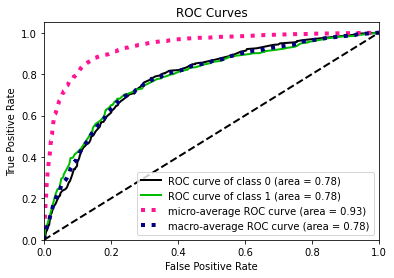

In [256]:
xg_clf.fit(X_train, y_train)
predicted_probas = xg_clf.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

In [ ]:
!pip install graphviz
!apt-get install graphviz

In [ ]:
from xgboost import plot_tree

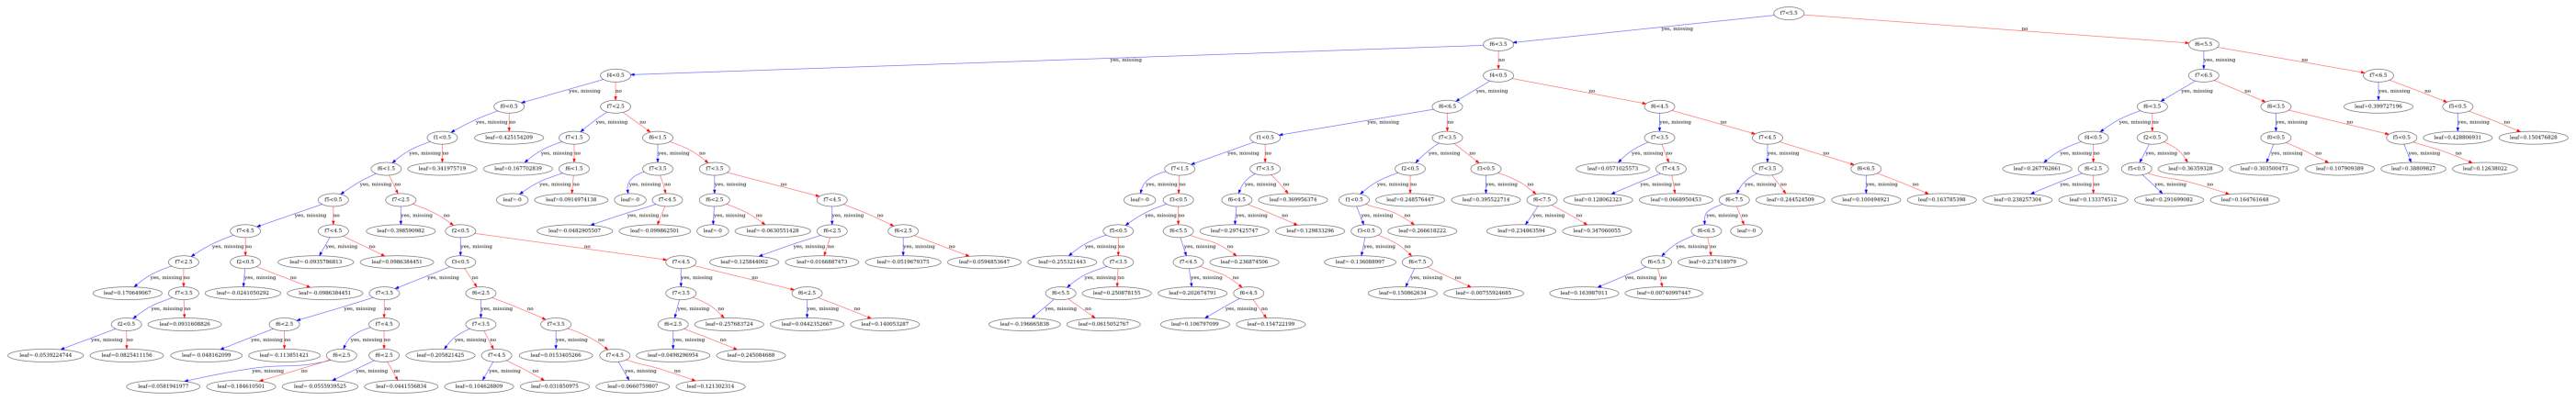

In [266]:
plot_tree(xg_clf, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(50, 100)

In [22]:
!pip install graphviz
!pip install pydotplus
!pip install six

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
